<a href="https://colab.research.google.com/github/JuanCastrillonL/Data-Integration-Analytics/blob/main/logica_borrosa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-fuzzy

import numpy as np
import skfuzzy as fuzz
from sklearn.cluster import KMeans
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 8.8 MB/s eta 0:00:00


In [ ]:
path = '/content/sample_data/7. LógicaBorrosa_EVERGREEEN.xlsx'

df = pd.read_excel(path,sheet_name=0)
df= np.array(df[['Eventos (Mes)','Severidad (KUSD)']]) #las variables de interes en este caso

df

#sacaré 5 clusters, muy pocos, pocos, moderados, muchos, bastantes

array([[ 4.        ,  2.86714059],
       [20.        ,  6.42094137],
       [22.        ,  2.17418093],
       ...,
       [53.        ,  1.90511915],
       [19.        ,  1.32914048],
       [21.        ,  4.84790494]])

Clusterizacion de las variables

In [ ]:
np.random.seed(42)

n_clusters=5 #numero de cualidades linguisticas (las que defini anteriormente)


#primero hago la clusterizacion de la frecuencia o el numero de eventos (mes)
clust_f = KMeans(n_clusters=n_clusters, init='random',random_state=42)
clust_f.fit(df[:,0].reshape(-1,1))

centros_f = clust_f.cluster_centers_
centros_f = np.array(np.sort(centros_f.flatten()))

labels_f = ['muy pocos  ', 'pocos', 'moderados', 'muchos', 'bastantes']

print('los clusters son:\n', centros_f)

print('\n muy pocos = 6.18\n', 'pocos = 17.21\n', 'moderados = 27.42\n', 'muchos = 38.52\n', 'bastantes = 51.42\n')


#busco la base de cada conjunto borroso (valor de pertenencia), que serian los sigmas
sigmas_f = np.zeros((n_clusters,1)) #distancias de un centro de clusters a otro, distancias entre esos centros
sigmas_f = sigmas_f.flatten()

for j in range(n_clusters):
  sigmas_f[j,]=np.sum(np.abs(centros_f-centros_f[j]))/4

print('la base de los conjuntos es:\n', sigmas_f)

#ahora evaluo solo 1 valor de frecuencia o eventos
eventos = 5
porcentaje_pertenencia = np.exp(-0.5*((centros_f-eventos)/sigmas_f)**2)

print('\n eventos:\n', eventos)
print('\n el % de pertenencia de esos eventos es:\n', porcentaje_pertenencia)



los clusters son:
 [ 6.17984694 17.20535714 27.42467949 38.52183908 51.41522491]

 muy pocos = 6.18
 pocos = 17.21
 moderados = 27.42
 muchos = 38.52
 bastantes = 51.42

la base de los conjuntos es:
 [27.46192822 19.19279556 16.63796498 19.41225488 29.08229425]

 eventos:
 5

 el % de pertenencia de esos eventos es:
 [0.99907752 0.81692644 0.4032152  0.22515044 0.279822  ]


ahora lo mismo pero con la severidad

In [ ]:
# Clusterización de la severidad
clust_s = KMeans(n_clusters=n_clusters, init='random', random_state=42)
clust_s.fit(df[:, 1].reshape(-1, 1))  # Ajusta a la columna de severidad (df[:, 1])

centros_s = clust_s.cluster_centers_
centros_s = np.array(np.sort(centros_s.flatten()))

labels_s = ['muy baja', 'baja', 'moderada', 'alta', 'muy alta']  # Etiquetas para la severidad, costo de dejar un contenedor en puerto

print('Los clusters de severidad son:\n', centros_s)

# Calcula la base de los conjuntos borrosos (sigmas) para la severidad
sigmas_s = np.zeros((n_clusters, 1))
sigmas_s = sigmas_s.flatten()

for j in range(n_clusters):
    sigmas_s[j] = np.sum(np.abs(centros_s - centros_s[j])) / 4

print('\nLa base de los conjuntos borrosos para la severidad es:\n', sigmas_s)

# Evalúa un valor de frecuencia y severidad
eventos = 5
porcentaje_pertenencia = np.exp(-0.5*((centros_f-eventos)/sigmas_f)**2)

print('\n eventos:\n', eventos)
print('\n el % de pertenencia de esos eventos es:\n', porcentaje_pertenencia)

severidad = 20
porcentaje_pertenencia_severidad = np.exp(-0.5 * ((centros_s - severidad) / sigmas_s)**2)

print('\n valor de ese gasto de tener contenedor en tierra:\n', severidad)
print('\n El % de pertenencia de esa severidad es:\n', porcentaje_pertenencia_severidad)


Los clusters de severidad son:
 [ 3.13318373  8.57540888 17.14839968 33.55760506 55.19521753]

La base de los conjuntos borrosos para la severidad es:
 [25.48597406 21.40430519 19.26105749 23.36335884 39.59156819]

 eventos:
 5

 el % de pertenencia de esos eventos es:
 [0.99907752 0.81692644 0.4032152  0.22515044 0.279822  ]

 valor de ese gasto de tener contenedor en tierra:
 20

 El % de pertenencia de esa severidad es:
 [0.80332591 0.86723472 0.98910043 0.84504089 0.67359743]


matriz de perdidas, mapa de perdidas

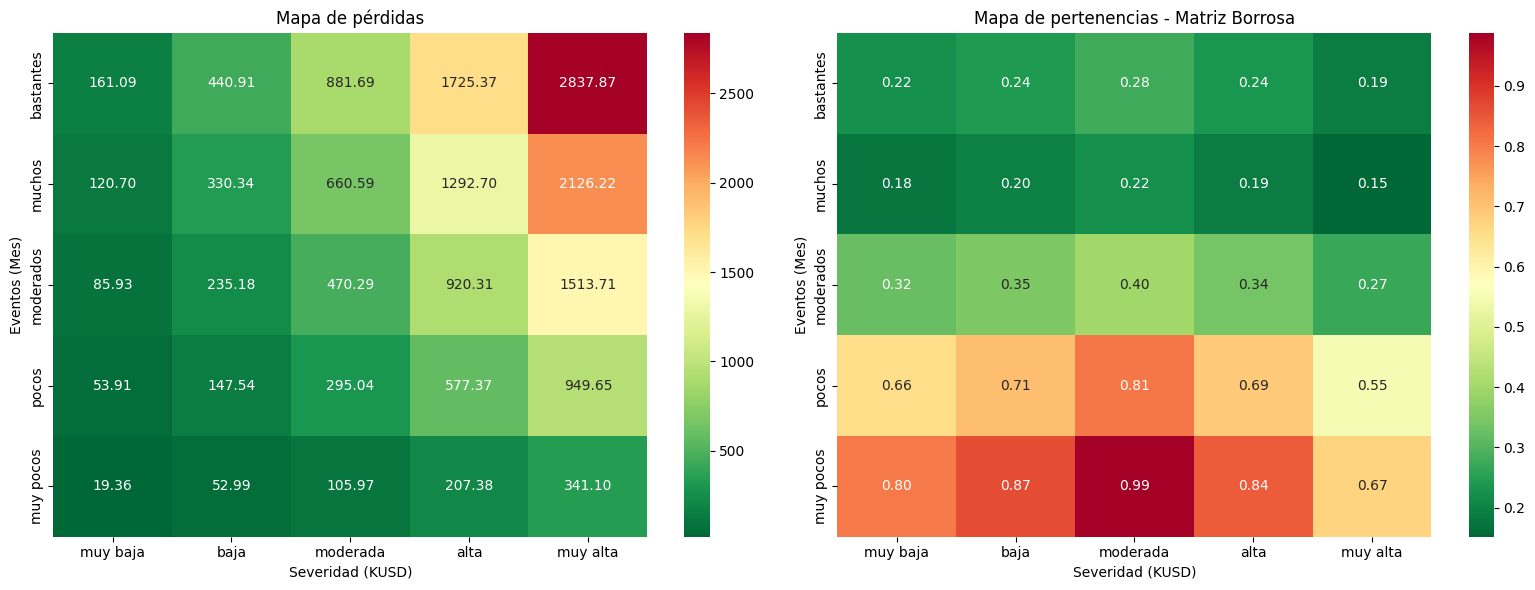

In [ ]:
from __future__ import annotations
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

mapa_perdidas = np.outer(centros_f, centros_s) #convulucion de todo

sns.heatmap(mapa_perdidas[::-1], annot=True, cmap='RdYlGn_r', fmt='.2f', ax=axes[0])
axes[0].set_title('matriz de pérdidas')
axes[0].set_xlabel('Severidad (KUSD)')
axes[0].set_ylabel('Eventos (Mes)')

axes[0].set_yticklabels(labels_f[::-1])
axes[0].set_xticklabels(labels_s)

mapa_pertenencia = np.outer(porcentaje_pertenencia, porcentaje_pertenencia_severidad) #convolucion de todo, es decir que multiplica todos con todos

sns.heatmap(mapa_pertenencia[::-1], annot=True, cmap='RdYlGn_r', fmt='.2f', ax=axes[1])
axes[1].set_title('Matriz Borrosa o mapa de pertenencia')
axes[1].set_xlabel('Severidad (miles de USD)')
axes[1].set_ylabel('Eventos (containers que se quedan por Mes)')

axes[1].set_yticklabels(labels_f[::-1])
axes[1].set_xticklabels(labels_s)

plt.tight_layout()

plt.show()

Calculo de la perdida

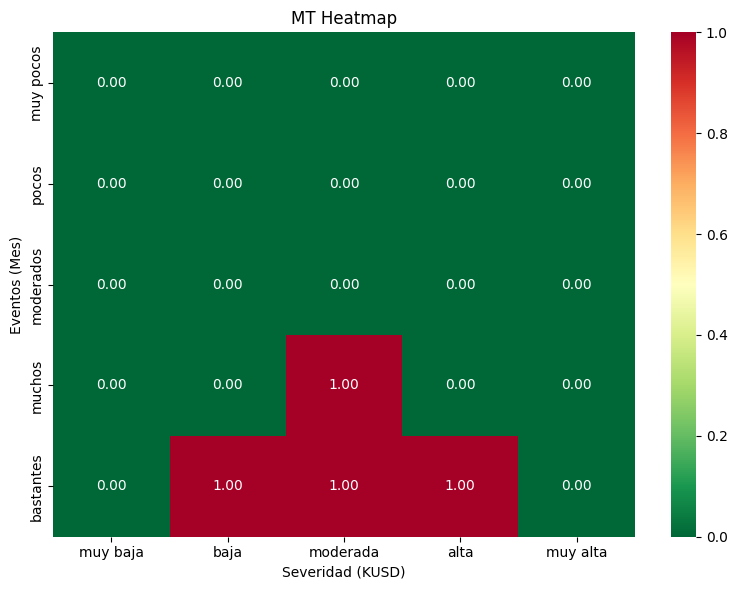

la perdida matematica es de 100
La perdida borrosa es de 160.86121784504775


In [ ]:
#estimacion de la perdida

#conversion de la matriz borrosa a un vector
VMB = np.array(sorted(mapa_pertenencia.flatten(), reverse=True))
MT = np.zeros((5,5))


for i in range(4):
  MT[np.where(mapa_pertenencia == VMB[i])] = 1


plt.figure(figsize=(8, 6))

# Heatmap for MT with inverted y-axis (data reversed)
sns.heatmap(MT[::-1], annot=True, cmap='RdYlGn_r', fmt='.2f')  # Reverse data order
plt.title('MT Heatmap')
plt.xlabel('Severidad (KUSD)')
plt.ylabel('Eventos (Mes)')

# Set yticklabels in original order:
plt.yticks(np.arange(len(labels_f)) + 0.5, labels_f) # Set y-tick labels in original order
plt.xticks(np.arange(len(labels_s)) + 0.5, labels_s) # Set x-tick labels

plt.tight_layout()
plt.show()

#calculo de la perdida
print('la perdida matematica es de', eventos*severidad)

perdida_borrosa = np.sum(mapa_perdidas * MT * mapa_pertenencia)/np.sum(mapa_pertenencia*MT)
print('La perdida borrosa es de', perdida_borrosa)

muestreo las variables aleatorias de freceuencia y severidad (muestreo de la perdida)

0 [4.] [2.44079944] [9.76319777]
1 [20.] [6.18968024] [123.79360488]
2 [5.] [6.03298873] [30.16494363]
3 [25.] [6.14283638] [153.57090955]
4 [4.] [6.61558165] [26.46232662]
5 [19.] [7.37207406] [140.06940706]
6 [44.] [6.97229386] [306.78092984]
7 [35.] [5.07780657] [177.72323006]
8 [29.] [4.59714938] [133.31733213]
9 [4.] [12.44023736] [49.76094942]
10 [19.] [13.50819783] [256.65575885]
11 [25.] [7.90283229] [197.57080737]
12 [10.] [3.48847527] [34.88475273]
13 [16.] [5.47510109] [87.60161743]
14 [31.] [19.23041705] [596.14292852]
15 [23.] [2.18628371] [50.28452542]
16 [20.] [6.3093403] [126.18680598]
17 [42.] [8.00857573] [336.36018087]
18 [13.] [11.17257149] [145.2434294]
19 [25.] [1.9615926] [49.03981497]
20 [49.] [7.94816701] [389.46018353]
21 [4.] [1.82557949] [7.30231796]
22 [35.] [7.60379921] [266.13297236]
23 [21.] [8.26038419] [173.46806804]
24 [26.] [1.7931559] [46.62205338]
25 [24.] [13.8408685] [332.18084392]
26 [10.] [10.58361074] [105.83610738]
27 [37.] [5.76789332] [213.

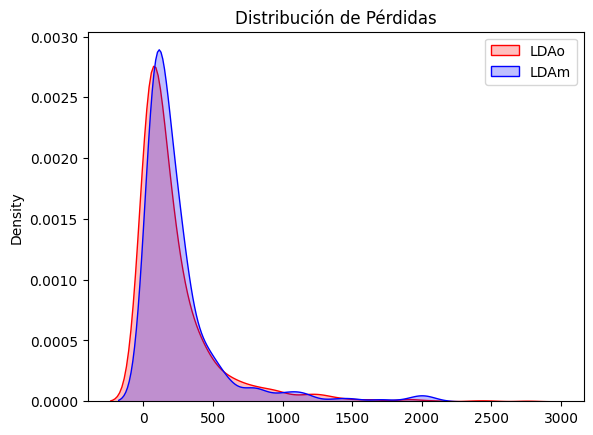

In [ ]:
dff=pd. DataFrame(df[:,0]) #DataFrame de Frecuencia
dfs=pd. DataFrame(df[:,1]) #DataFrame de Severidad

#Se procede con el muestreo
dff=pd.DataFrame(df[:,0]) #DataFrame de Frecuencia
dfs=pd.DataFrame(df[:,1]) #DataFrame de Severidad

#Se procede con el muestreo
Xfm=np.array(dff.sample(n=1000))
Xsm=np.array(dfs.sample(n=1000))
XLDAm=np.zeros((1000,1)) #muestreada
XLDA = np.zeros((1000,1)) #real

for k in range(1000):
  print(k,Xfm[k], Xsm[k],Xfm[k]*Xsm[k])
  VPf=np.exp(-0.5*((centros_f -Xfm[k])/sigmas_f)**2)
  VPs=np.exp(-0.5*((centros_s-Xsm[k])/sigmas_s)**2)
  mapa_pertenencia=np.outer(VPf, VPs)

#puntos de maxima pertenencia
  VMB = np.array(sorted(mapa_pertenencia.flatten(), reverse=True))
  MT= np.zeros((5,5))

  for i in range(4): #diga donde estan los 4 vañlores de pertenencia mas grandes
    MT[np.where(mapa_pertenencia == VMB[i])] = 1

  XLDAm[k]=np. sum(mapa_perdidas*mapa_pertenencia*MT)/np.sum(mapa_pertenencia*MT) #perdida borrosa
  XLDA[k]=Xfm[k]*Xsm[k] #perdida matematica simple

plt. figure()
sns.kdeplot(x=XLDA.flatten(), fill = True, color='red', label= 'LDAo')
sns.kdeplot(x=XLDAm.flatten(), fill = True, color='blue', label='LDAm')
plt. title('Distribución de Pérdidas')
plt. legend()
plt.show()



Matriz de impacto

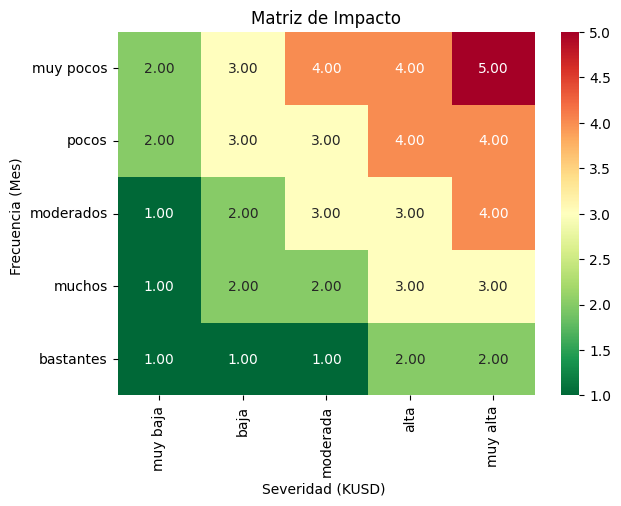

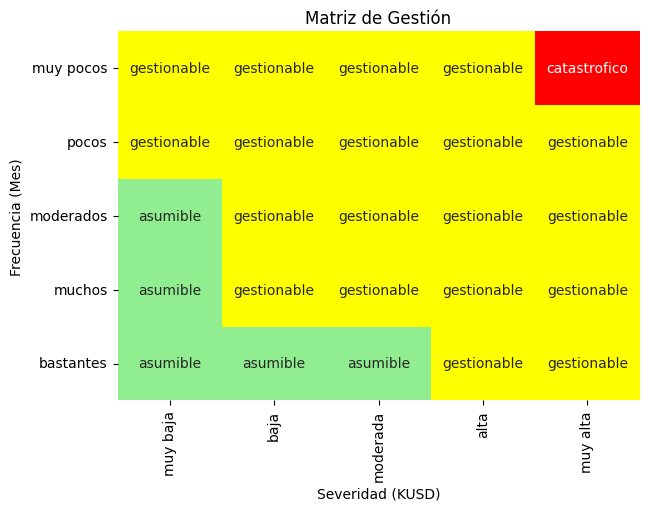

In [ ]:
import matplotlib.colors
#Se crea la matriz de impacto
MI=np. array ([[1,1,1,2,2],[1,2,2,3,3], [1,2,3,3,4], [2,3,3,4,4], [2,3,4,4,5]])

MI_ordenada = MI[:: -1, :]

plt.figure()
sns.heatmap(MI_ordenada, annot=True, cmap= 'RdYlGn_r', fmt='.2f')
plt.yticks(np.arange(len(labels_f)) + 0.5, labels_f, rotation=0)
plt.xticks(np.arange(len(labels_s)) + 0.5, labels_s, rotation=90)
plt.tight_layout()
plt.title('Matriz de Impacto')
plt.ylabel( 'Frecuencia (Mes) ')
plt.xlabel( 'Severidad (KUSD) ')

management_actions = {
    1: "asumible",
    2: "gestionable",
    3: "gestionable",
    4: "gestionable",
    5: "catastrofico"
}



MI_ordenada = management_matrix[::-1, :]  # Invert the matrix

# Create a dictionary mapping categories to numerical values
category_mapping = {
    "asumible": 1,
    "gestionable": 2,
    "catastrofico": 3,
}

# Create a colormap for the categories
category_colors = ["lightgreen", "yellow", "red"]
cmap = matplotlib.colors.ListedColormap(category_colors)

# Create a numerical matrix for heatmap
MI_numerical = np.vectorize(category_mapping.get)(MI_ordenada)

plt.figure()

sns.heatmap(MI_numerical, annot=MI_ordenada, fmt="", cmap=cmap, cbar=False)   #cbar=False to hide the color bar, as it is not meaningful for text data
plt.yticks(np.arange(len(labels_f)) + 0.5, labels_f, rotation=0)
plt.xticks(np.arange(len(labels_s)) + 0.5, labels_s, rotation=90)
plt.tight_layout()
plt.title('Matriz de Gestión')
plt.ylabel('Frecuencia (Mes)')
plt.xlabel('Severidad (KUSD)')
plt.show()

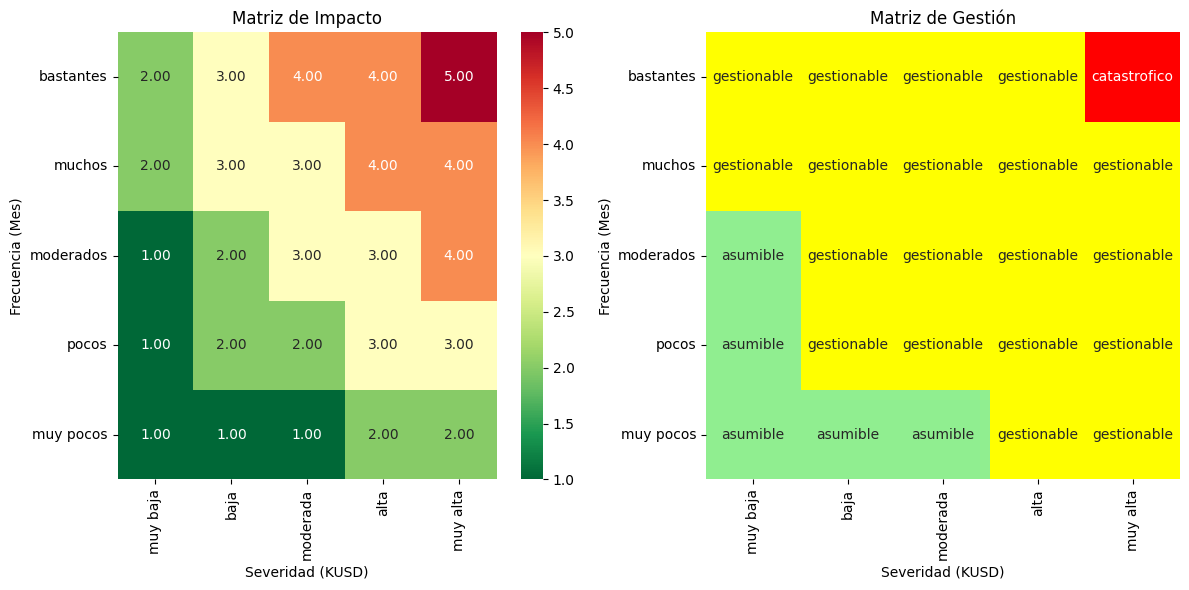

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot Matriz de Impacto on the first subplot (with reversed y-axis labels)
sns.heatmap(MI[::-1], annot=True, cmap='RdYlGn_r', fmt='.2f', ax=axes[0])  # Reverse MI data
axes[0].set_title('Matriz de Impacto')
axes[0].set_ylabel('Frecuencia (Mes)')
axes[0].set_xlabel('Severidad (KUSD)')
axes[0].set_yticks(np.arange(len(labels_f)) + 0.5)
axes[0].set_yticklabels(labels_f[::-1], rotation=0)  # Reverse labels_f here
axes[0].set_xticks(np.arange(len(labels_s)) + 0.5)
axes[0].set_xticklabels(labels_s, rotation=90)

# Plot Matriz de Gestión on the second subplot (with reversed y-axis labels)
management_matrix = np.vectorize(management_actions.get)(MI)
MI_numerical = np.vectorize(category_mapping.get)(management_matrix[::-1])  # Reverse management_matrix data
sns.heatmap(MI_numerical, annot=management_matrix[::-1], fmt="", cmap=cmap, cbar=False, ax=axes[1])  # Reverse management_matrix data
axes[1].set_title('Matriz de Gestión')
axes[1].set_ylabel('Frecuencia (Mes)')
axes[1].set_xlabel('Severidad (KUSD)')
axes[1].set_yticks(np.arange(len(labels_f)) + 0.5)
axes[1].set_yticklabels(labels_f[::-1], rotation=0)
axes[1].set_xticks(np.arange(len(labels_s)) + 0.5)
axes[1].set_xticklabels(labels_s, rotation=90)

plt.tight_layout()
plt.show()